# SVM

### 1 - Dataset: enron_spam_data_prep.csv. Link: https://github.com/MWiechmann/enron_spam_data.

### a) Train-test: 70%-30%. Use the approach below:
**- SVM: Choose an RBF kernel and use grid-search to adjust the C hyperparameters (values 2^-5; 2^-3; 2^-1;...; 2^11; 2^13; 2^15) and (values 2^-15; 2^-13; 2^-11; : : : ; 2^1; 2^2; 2^3).**
</br>
**- cv = 10 folds**

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = np.genfromtxt("../data/enron_spam_data_prep.csv", delimiter = ',')
data.shape

(33716, 1001)

In [4]:
x = data[:,:-1]
y = data[:,-1]

In [5]:
x.shape, y.shape

((33716, 1000), (33716,))

In [11]:
# The dataset is too large. For this reason, it will be split into 80/20% and only 20% will be used for the tests.
x_rest, x_svc, y_rest, y_svc = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
x_rest.shape, x_svc.shape, x_rest.shape, y_svc.shape

((26972, 1000), (6744, 1000), (26972, 1000), (6744,))

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_svc, y_svc, test_size=0.3, random_state=42)

In [14]:
scaler = StandardScaler().fit(x_train)
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [15]:
C_range = [2**x for x in np.arange(-5.0,16.0,2)]
gamma_range = [2**x for x in np.arange(-15.0,4.0,2)]
C_range, gamma_range

([0.03125, 0.125, 0.5, 2.0, 8.0, 32.0, 128.0, 512.0, 2048.0, 8192.0, 32768.0],
 [3.0517578125e-05,
  0.0001220703125,
  0.00048828125,
  0.001953125,
  0.0078125,
  0.03125,
  0.125,
  0.5,
  2.0,
  8.0])

In [16]:
param_grid = dict(gamma=gamma_range, C=C_range)

In [17]:
clf = svm.SVC(kernel='rbf')

In [18]:
CV_svm = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 10).fit(X_train_scaled, y_train)

In [19]:
CV_svm.cv_results_

{'mean_fit_time': array([12.42063916, 12.57526762, 14.75770707, 13.85239964, 13.67940032,
        13.49396238, 11.62118986, 12.67194462, 12.41510801, 12.51090696,
        12.12350183, 10.94149234,  8.75239611, 10.7373863 , 11.78838611,
        12.04572666, 11.73039534, 12.6426132 , 12.63882091, 13.28100307,
        11.01460147,  7.05660372,  5.8049109 ,  9.03929791, 11.57729573,
        11.81769433, 11.83710001, 13.38069892, 13.47660325, 13.6453953 ,
         6.4209022 ,  4.24931498,  4.26730349, 11.07758555, 12.30959966,
        12.26529522, 12.35278275, 13.16019821, 13.04780877, 12.93760388,
         3.95510304,  3.09939799,  4.13519363, 11.19798956, 12.22729118,
        12.05100636, 16.07619367, 12.90750203, 12.94258332, 12.94409847,
         2.84309142,  2.74119694,  4.16090288, 11.1141047 , 12.05339811,
        11.85870979, 11.85089686, 12.98560278, 12.71340516, 12.96810598,
         2.60400794,  2.75190113,  4.20340018, 11.25519862, 12.13639259,
        11.87900116, 12.04948993, 

In [20]:
CV_svm.best_params_

{'C': 8.0, 'gamma': 0.00048828125}

In [21]:
CV_svm.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.03125, 0.125, 0.5, 2.0, 8.0, 32.0, 128.0,
                               512.0, 2048.0, 8192.0, 32768.0],
                         'gamma': [3.0517578125e-05, 0.0001220703125,
                                   0.00048828125, 0.001953125, 0.0078125,
                                   0.03125, 0.125, 0.5, 2.0, 8.0]})>

In [22]:
# Training with best parameters
clf = svm.SVC(kernel='rbf', C = 8.0, gamma = 0.00048828125).fit(X_train_scaled,y_train)

In [23]:
# Accuracy for training dataset
clf.score(X_train_scaled,y_train)

0.9987288135593221

### b) For each model, report the selected hyperparameters and the accuracy, recall, precision and F1-score metrics in the test data. Also plot the ROC curve and the Precision-Recall curve for each optimized model.

In [24]:
# Accuracy for test dataset
pred = clf.predict(X_test_scaled)
accuracy_score(y_test, pred)

0.9688735177865613

In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      1011
         1.0       0.96      0.98      0.97      1013

    accuracy                           0.97      2024
   macro avg       0.97      0.97      0.97      2024
weighted avg       0.97      0.97      0.97      2024



In [26]:
clf.get_params

<bound method BaseEstimator.get_params of SVC(C=8.0, gamma=0.00048828125)>

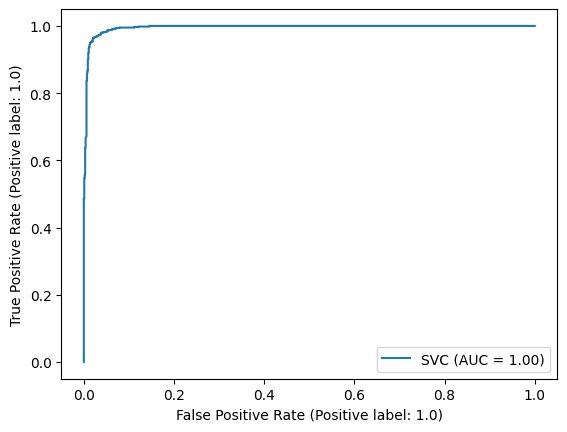

In [27]:
# ROC curve
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test_scaled, y_test, ax=ax)

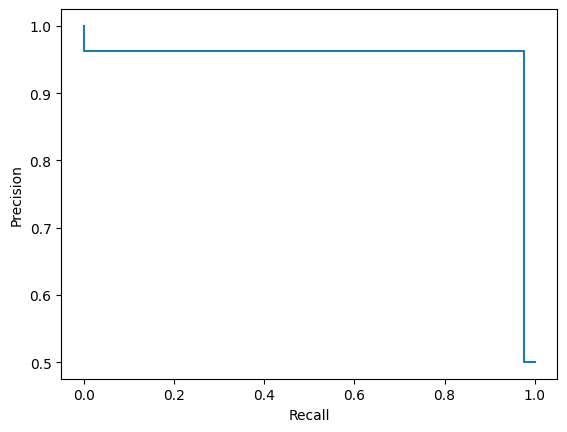

In [28]:
# Precision Recall
precision, recall, _ = precision_recall_curve(y_test, pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()